## Python Notebook Looking at Phase Info

So this looks like a cool way to kind of test the formatting and how notebooks work, and practice for writing up what I have done. Also it should be a more organized way of sharing the info and showing what tests were done step-by-step. 
   
Imports are the usual, wavelet_transforms just combines all the wavelet transforms and there inverses that I now have in python. The 'nonguassianextraction' fan transform returns the separated gaussian and non-gaussian parts of the wavelets.

In [8]:
%matplotlib inline
import numpy as np
import wavelet_transforms as wts
from nonguassianextraction import fan_transform
from astropy.io import fits
import matplotlib.pyplot as plt
import fbm2d as fbm
print 'done import'

done import


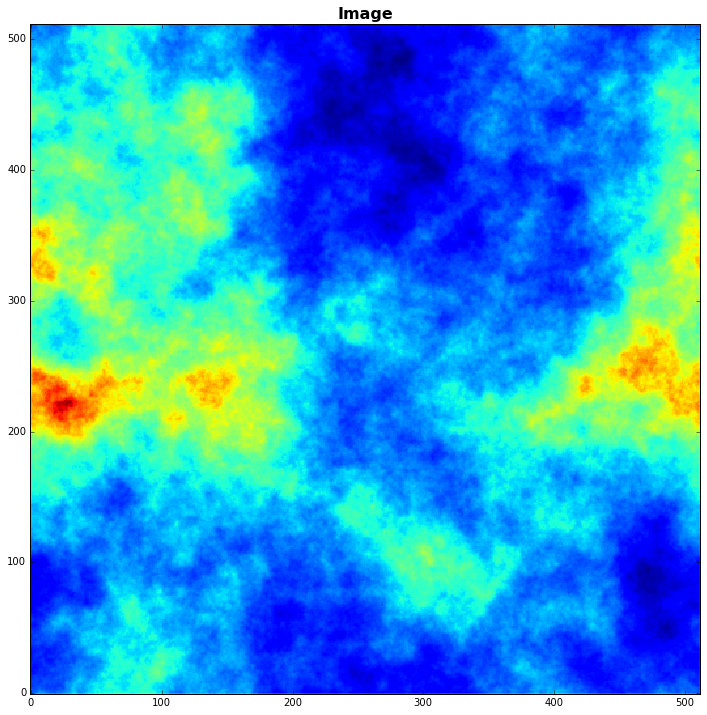

In [11]:
#image creation#
image=fbm.fbm2d(-3.2,512,512)
image=np.exp(image)
image=image-image.min()


original, oax = plt.subplots(1,1,figsize=(12, 12))
oax.imshow(image, origin='lower', interpolation='None')
oax.set_title('Image', fontsize=16, fontweight='bold')

In [12]:
 #deconstruction#
wt,wn,wc,tab_k,s1ac,s1a=fan_transform(image)
wc=np.sum(wc, axis=3)
rec_c=wts.halo_inverse(wc,tab_k)
rec_n=wts.halo_inverse(wn,tab_k)
x_c=wc.real
y_c=wc.imag
x_n=wn.real
y_n=wn.imag
print 'deconstructed'

nonguassianextraction.py:51: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  S1 = np.zeros((na,nb,M))
nonguassianextraction.py:52: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  wt= np.zeros((na,nb,M), dtype=complex)
nonguassianextraction.py:62: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  phaseo=np.zeros((na,nb,N))
nonguassianextraction.py:63: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  amplio=np.zeros((na,nb,N))
nonguassianextraction.py:66: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  temoin=np.zeros((na,nb))
nonguassianextraction.py:67: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in 

deconstructed


nonguassianextraction.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  Sdc[i,j]=np.mean((np.conj(Wcp)*Wcp))


## Choosing Scales to Look at

Initially I had this as a prompt, but this way it is hardwired, but easily changeable because it is just one cell.

Scales 10-18 are looked at because they seem the most interesting. There are 20 scales total in the deconstructed image, so these represent mid to high range.

In [13]:
start=10
stop=18
total=stop-start+1
col=int(np.sqrt(total))
row=int(total/col)
index=np.arange(total).reshape(col,row)
#print index

## Plotting

The rest of the code is finally the plotting of the images. The aspect ratio is kept at one, which was initially a problem for comparison. 

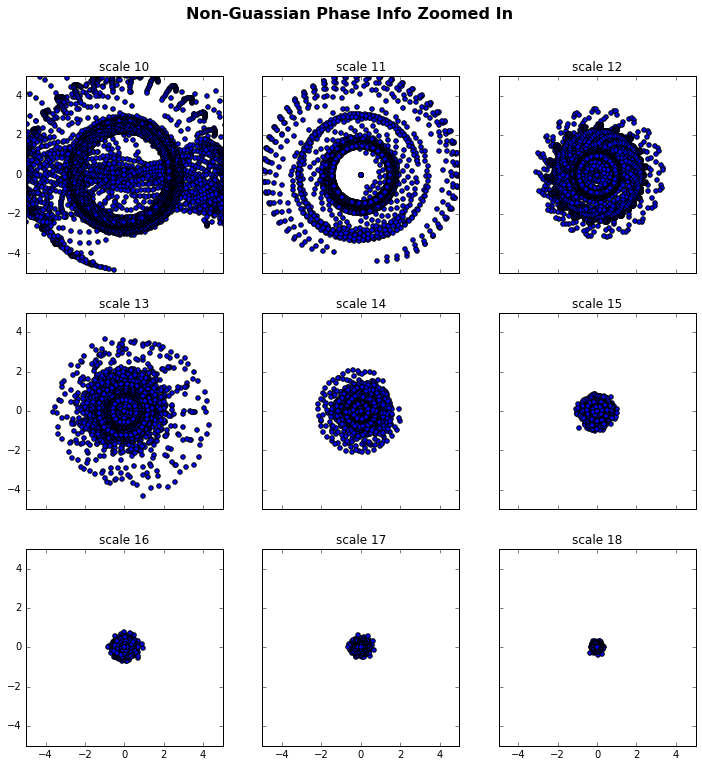

In [23]:
##plotting nongaussian phase info#
#fig = plt.figure(1, figsize=(14,14))
ng_fig, ng_axarr = plt.subplots(col, row, figsize=(12,12), sharex='col', sharey='row')
xlim = 5.
ylim = xlim
for i in range(col):
    for j in range(row):
        ng_axarr[i,j].scatter( x_c [ :,:,index[i,j]+ start ],y_c[:,:,index[i,j]+start])
        ng_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        ng_axarr[i,j].set_xlim(-xlim,xlim)
        ng_axarr[i,j].set_ylim(-ylim,ylim)
ng_fig.suptitle('Non-Guassian Phase Info Zoomed In', fontsize=16, fontweight='bold')

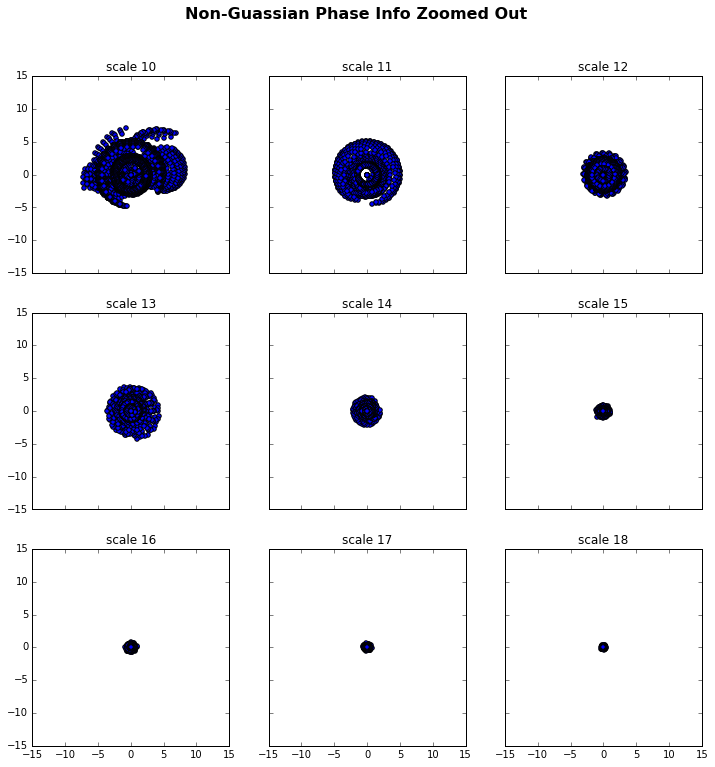

In [24]:
##plotting nongaussian phase info zoomed out#

zng_fig, zng_axarr = plt.subplots(col, row, figsize=(12,12), sharex='col', sharey='row')
xlim = 15.
ylim = xlim
for i in range(col):
    for j in range(row):
        zng_axarr[i,j].scatter( x_c [ :,:,index[i,j]+ start ],y_c[:,:,index[i,j]+start])
        zng_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        zng_axarr[i,j].set_xlim(-xlim,xlim)
        zng_axarr[i,j].set_ylim(-ylim,ylim)
zng_fig.suptitle('Non-Guassian Phase Info Zoomed Out', fontsize=16, fontweight='bold')

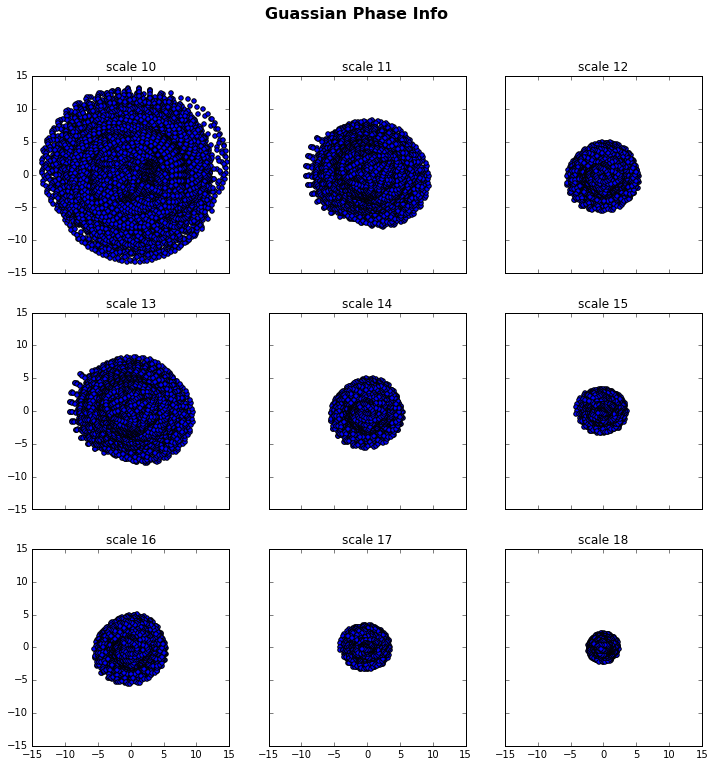

In [25]:
##plotting gaussian phase info#
#plt.figure(2)
g_fig, g_axarr= plt.subplots(col, row, sharex='col', sharey='row', figsize=(12,12))
xlim = 15.
ylim = xlim
for i in range(col):
    for j in range(row):
        g_axarr[i,j].scatter(x_n[:,:,i+j+10],y_n[:,:,i+j+10])
        g_axarr[i,j].set_title('scale '+str(index[i,j]+start))
        g_axarr[i,j].set_xlim(-xlim,xlim)
        g_axarr[i,j].set_ylim(-ylim,ylim)
g_fig.suptitle('Guassian Phase Info', fontsize=16, fontweight='bold')

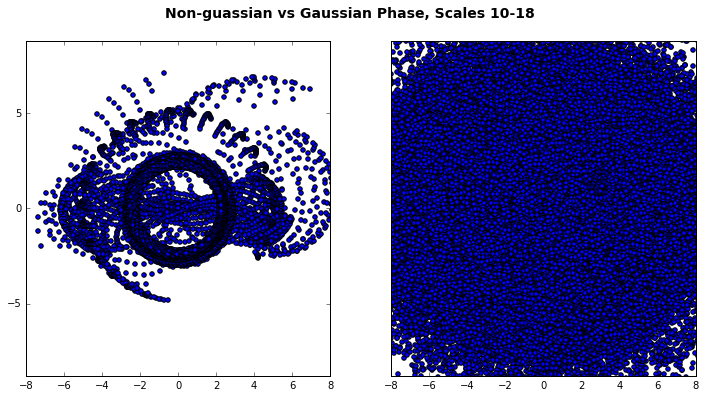

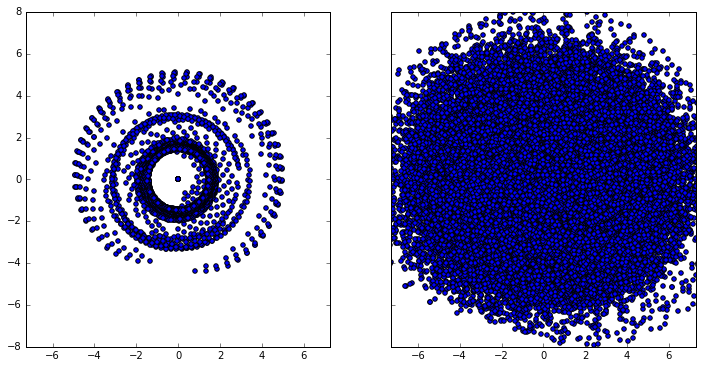

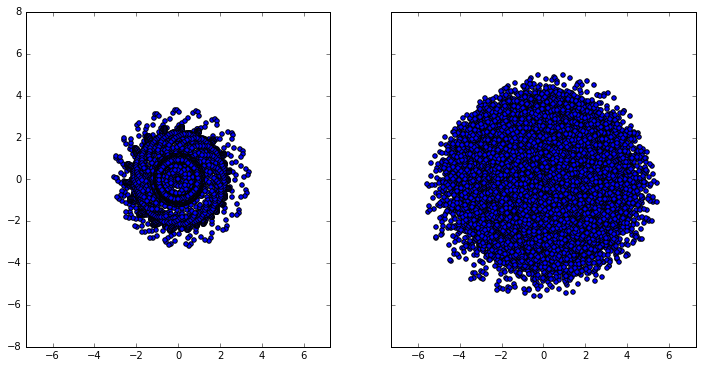

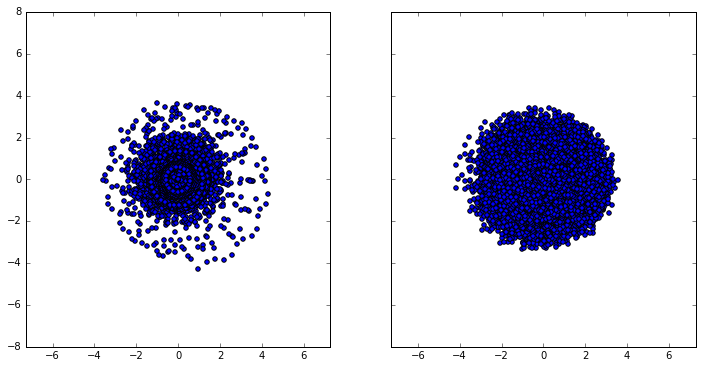

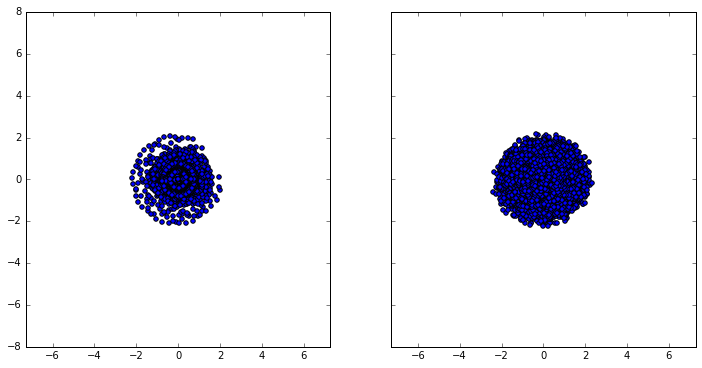

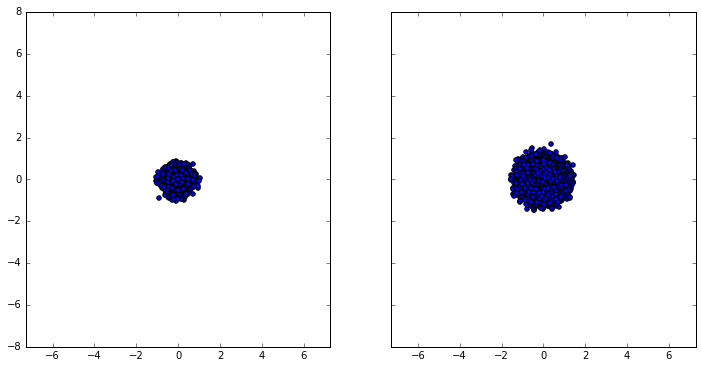

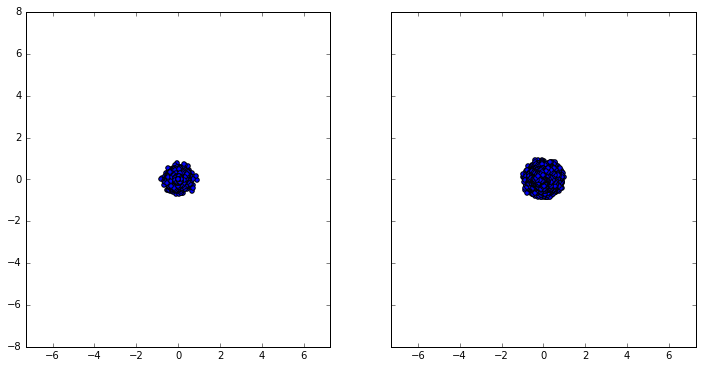

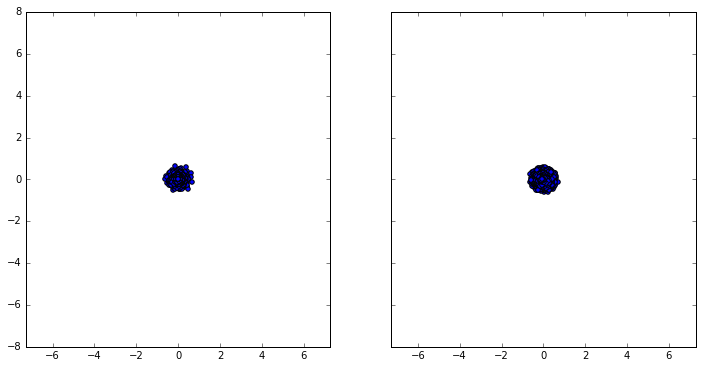

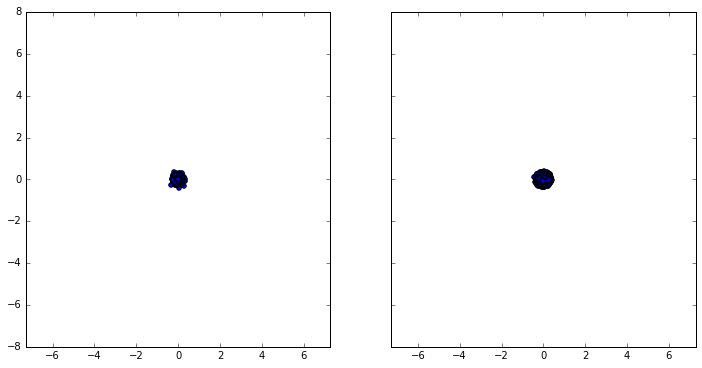

In [26]:
##on same plot#
fig=list()
axarr=list()
xmax = 8.
ymax = xmax
for i in range (total):
    fig_i, axarr_i= plt.subplots (1,2, sharex='all', sharey='all', figsize=(12,6))
    axarr_i[0].scatter(x_c[:,:,i+start], y_c[:,:,i+start])
    axarr_i[1].scatter(x_n[:,:,i+start], y_n[:,:,i+start])
    axarr_i[0].set(xlim=[-xmax, xmax], ylim=[-ymax, ymax], aspect=1)# adjustable='box-forced')
    axarr_i[1].set(xlim=[-xmax, xmax], ylim=[-ymax, ymax], aspect=1)
    #plt.axes().set_aspect('equal', 'datalim')
    fig.append(fig_i)
    axarr.extend(axarr_i)
fig[0].suptitle('Non-guassian vs Gaussian Phase, Scales 10-18', fontsize=14, fontweight='bold')
 